## Лабораторна робота №8 Структура даних граф. Алгоритми на графах
## Виконав: Буханцев Максим

### 1. Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі 

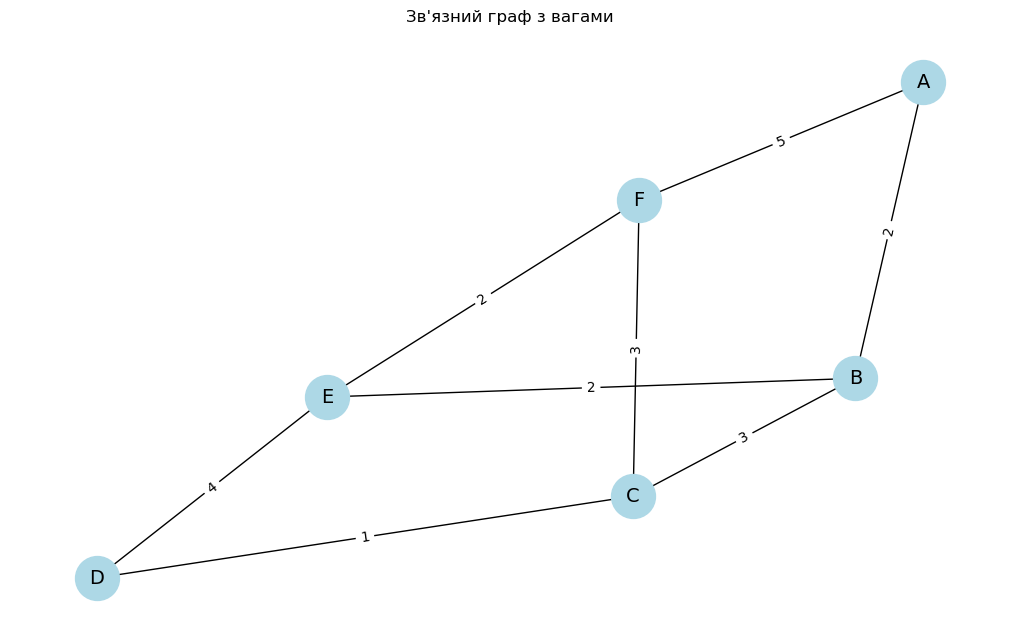

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([
    ("A", "B", {"weight": 2}),
    ("B", "C", {"weight": 3}),
    ("C", "D", {"weight": 1}),
    ("D", "E", {"weight": 4}),
    ("E", "F", {"weight": 2}),
    ("F", "A", {"weight": 5}),  
    ("B", "E", {"weight": 2}),
    ("C", "F", {"weight": 3})
])


pos = nx.spring_layout(G, seed=42)

weights = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='black')
plt.title("Зв'язний граф з вагами")
plt.show()

### 2.  Для свого варіанту реалізувати всі алгоритми, згідно з прикладами, наведеними вище.

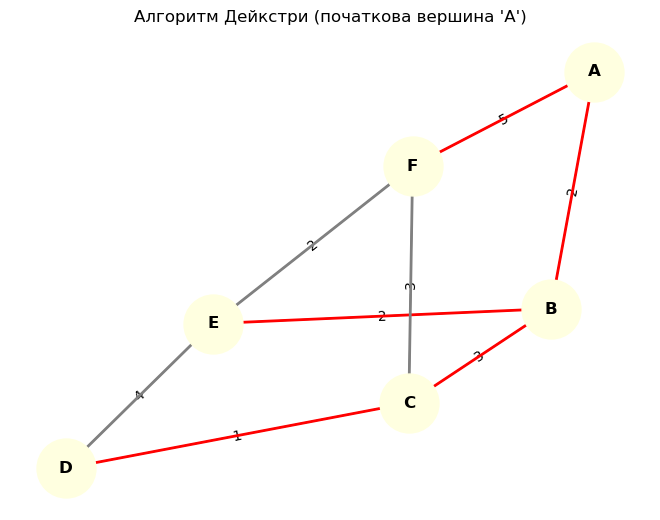

Найкоротші шляхи від вершини 'A' (Дейкстра): {'A': ['A'], 'B': ['A', 'B'], 'F': ['A', 'F'], 'C': ['A', 'B', 'C'], 'E': ['A', 'B', 'E'], 'D': ['A', 'B', 'C', 'D']}
Довжини шляхів: {'A': 0, 'B': 2, 'E': 4, 'F': 5, 'C': 5, 'D': 6}


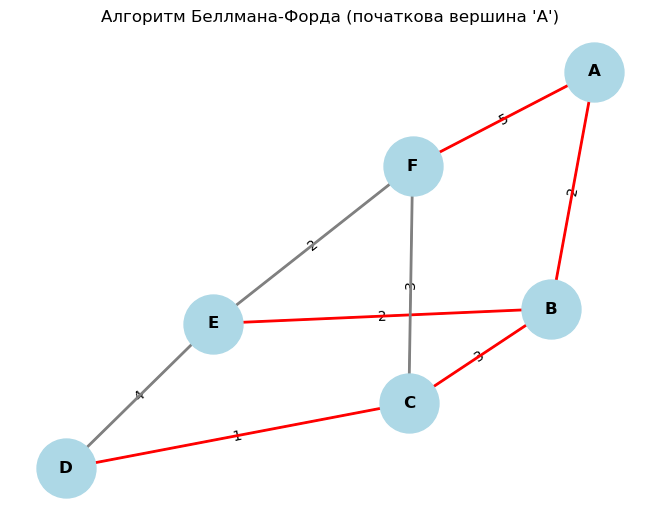

Найкоротші шляхи від вершини 'A' (Беллман-Форд): {'A': ['A'], 'B': ['A', 'B'], 'F': ['A', 'F'], 'C': ['A', 'B', 'C'], 'E': ['A', 'B', 'E'], 'D': ['A', 'B', 'C', 'D']}
Довжини шляхів: {'A': 0, 'B': 2, 'F': 5, 'C': 5, 'E': 4, 'D': 6}


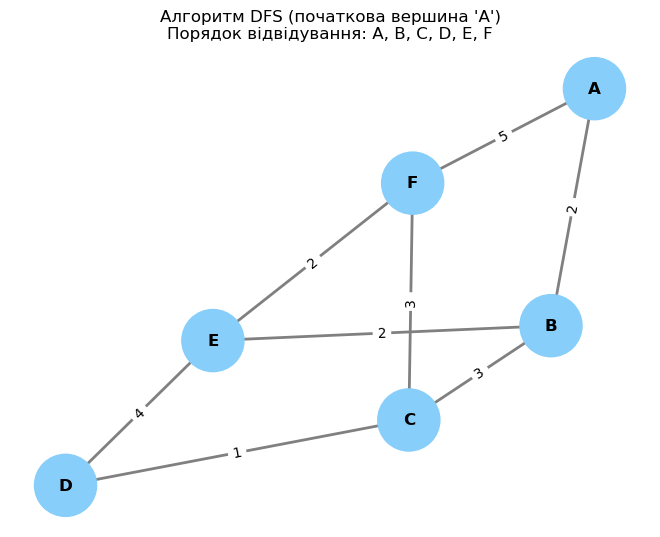

Порядок відвідування вузлів (DFS з початкової вершини 'A'): ['A', 'B', 'C', 'D', 'E', 'F']


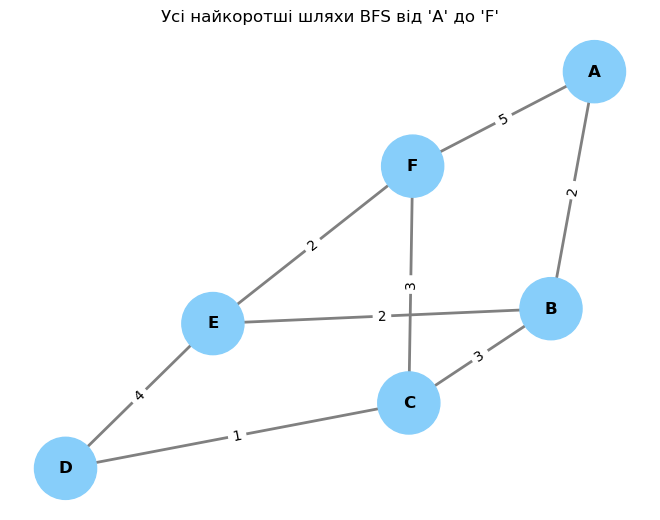

Усі найкоротші шляхи (за кількістю ребер) від 'A' до 'F':
  Шлях: ['A', 'F'], Ребра: (A, F, вага: 5)
  Шлях: ['A', 'B', 'C', 'F'], Ребра: (A, B, вага: 2), (B, C, вага: 3), (C, F, вага: 3)
  Шлях: ['A', 'B', 'E', 'F'], Ребра: (A, B, вага: 2), (B, E, вага: 2), (E, F, вага: 2)
  Шлях: ['A', 'B', 'C', 'D', 'E', 'F'], Ребра: (A, B, вага: 2), (B, C, вага: 3), (C, D, вага: 1), (D, E, вага: 4), (E, F, вага: 2)
  Шлях: ['A', 'B', 'E', 'D', 'C', 'F'], Ребра: (A, B, вага: 2), (B, E, вага: 2), (E, D, вага: 4), (D, C, вага: 1), (C, F, вага: 3)


In [17]:
# Алгоритми на графі КОРИСТУВАЧА
import networkx as nx
import matplotlib.pyplot as plt

# === Створення графа з прикладу ===
G = nx.Graph()
G.add_edges_from([
    ("A", "B", {"weight": 2}),
    ("B", "C", {"weight": 3}),
    ("C", "D", {"weight": 1}),
    ("D", "E", {"weight": 4}),
    ("E", "F", {"weight": 2}),
    ("F", "A", {"weight": 5}),
    ("B", "E", {"weight": 2}),
    ("C", "F", {"weight": 3})
])

pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

# === Алгоритм Дейкстри ===
source_node = 'A'
dijkstra_paths = nx.shortest_path(G, source=source_node, weight='weight')
dijkstra_lengths = nx.shortest_path_length(G, source=source_node, weight='weight')

nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=1800, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges = set()
for path in dijkstra_paths.values():
    for i in range(len(path) - 1):
        path_edges.add(tuple(sorted((path[i], path[i+1]))))

edge_colors = ['red' if tuple(sorted(e)) in path_edges else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2)

plt.title(f"Алгоритм Дейкстри (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}' (Дейкстра): {dijkstra_paths}")
print(f"Довжини шляхів: {dict(dijkstra_lengths)}")

# === Алгоритм Беллмана-Форда ===
bf_paths = nx.single_source_bellman_ford_path(G, source=source_node, weight='weight')
bf_lengths = nx.single_source_bellman_ford_path_length(G, source=source_node, weight='weight')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1800, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

path_edges_bf = set()
for path in bf_paths.values():
    for i in range(len(path) - 1):
        path_edges_bf.add(tuple(sorted((path[i], path[i+1]))))

edge_colors_bf = ['red' if tuple(sorted(e)) in path_edges_bf else 'gray' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors_bf, width=2)

plt.title(f"Алгоритм Беллмана-Форда (початкова вершина '{source_node}')")
plt.axis('off')
plt.show()

print(f"Найкоротші шляхи від вершини '{source_node}' (Беллман-Форд): {bf_paths}")
print(f"Довжини шляхів: {dict(bf_lengths)}")

# === DFS (обхід у глибину) ===
dfs_order = list(nx.dfs_preorder_nodes(G, source=source_node))
node_colors = ['lightskyblue' if node in dfs_order else 'lightgray' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Алгоритм DFS (початкова вершина '{source_node}')\nПорядок відвідування: {', '.join(dfs_order)}")
plt.axis('off')
plt.show()

print(f"Порядок відвідування вузлів (DFS з початкової вершини '{source_node}'): {dfs_order}")

# === BFS (усі найкоротші шляхи до F) ===
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_node in set(graph.adj[vertex].keys()) - set(path):
            if next_node == goal:
                yield path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))

target_node = 'F'
all_shortest_paths = list(bfs_paths(G, source_node, target_node))

node_colors = ['lightskyblue' if node in nx.shortest_path(G, source=source_node) else 'lightgray' for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=12, font_weight='bold', width=2, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title(f"Усі найкоротші шляхи BFS від '{source_node}' до '{target_node}'")
plt.axis('off')
plt.show()

if all_shortest_paths:
    print(f"Усі найкоротші шляхи (за кількістю ребер) від '{source_node}' до '{target_node}':")
    for path in all_shortest_paths:
        path_edges_with_weights = []
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            weight = G.get_edge_data(u, v).get('weight', 1)
            path_edges_with_weights.append(f"({u}, {v}, вага: {weight})")
        print(f"  Шлях: {path}, Ребра: {', '.join(path_edges_with_weights)}")
else:
    print(f"Шлях від '{source_node}' до '{target_node}' не знайдено за допомогою BFS.")


## Контрольні питання

- Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.
**Граф — це множина вершин і ребер, які з’єднують ці вершини. Приклади: дорожня мережа, соціальні мережі, маршрути доставки.**

- Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.
**Існують орієнтовані, неорієнтовані, зважені, незважені, зв'язні, деревоподібні графи. У орієнтованому графі ребра мають напрям, у неорієнтованому — ні.**

- Як можна представити граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.
**Граф можна представити матрицею суміжності або списком суміжності. Список ефективніший для розріджених графів.**

- Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.
**BFS обходить граф рівнями, починаючи з вершини. Застосовується для знаходження найкоротших шляхів у незважених графах, перевірки зв'язності.**

- Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.
**DFS заглиблюється в граф до останньої вершини, потім повертається. На відміну від BFS, DFS використовує стек. Застосовується у пошуку компонент зв’язності, перевірці циклів.**

- Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?
**Алгоритм Дейкстри знаходить найкоротші шляхи від однієї вершини до всіх інших у зваженому графі. Працює тільки з не-негативними вагами ребер.**